In [1]:
import pandas as pd

from pycaret.classification import *

pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_csv('Diabetes Classification.csv')

In [3]:
df

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,Caucasian,Female,[0-10),unknown,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,unknown
1,Caucasian,Female,[10-20),unknown,1,7,3,unknown,unknown,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),unknown,1,7,2,unknown,unknown,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),unknown,1,7,2,unknown,unknown,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),unknown,1,7,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),unknown,3,7,3,MC,unknown,51,0,16,0,0,0,endocrine,mental,circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,YES,Emergency
101762,AfricanAmerican,Female,[80-90),unknown,4,5,5,MC,unknown,33,3,18,0,0,1,digestive,endocrine,ill-defined,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency
101763,Caucasian,Male,[70-80),unknown,1,7,1,MC,unknown,53,0,9,1,0,0,infections,genitourinary,mental,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency
101764,Caucasian,Female,[80-90),unknown,3,7,10,MC,Surgery-General,45,2,21,0,0,1,injury,blood,injury,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent


In [4]:
df.shape

(101766, 48)

In [5]:
df.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   race                        101766 non-null  object
 1   gender                      101766 non-null  object
 2   age                         101766 non-null  object
 3   weight                      101766 non-null  object
 4   discharge_disposition_id    101766 non-null  int64 
 5   admission_source_id         101766 non-null  int64 
 6   time_in_hospital            101766 non-null  int64 
 7   payer_code                  101766 non-null  object
 8   medical_specialty           101766 non-null  object
 9   num_lab_procedures          101766 non-null  int64 
 10  num_procedures              101766 non-null  int64 
 11  num_medications             101766 non-null  int64 
 12  number_outpatient           101766 non-null  int64 
 13  number_emergency            1

## Feature Selection

### Drop columns

In [7]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_description'],
      dtype='object')

In [8]:
df

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type_description
0,Caucasian,Female,[0-10),unknown,25,1,1,unknown,Pediatrics-Endocrinology,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,unknown
1,Caucasian,Female,[10-20),unknown,1,7,3,unknown,unknown,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,YES,Emergency
2,AfricanAmerican,Female,[20-30),unknown,1,7,2,unknown,unknown,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,Caucasian,Male,[30-40),unknown,1,7,2,unknown,unknown,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,Caucasian,Male,[40-50),unknown,1,7,1,unknown,unknown,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),unknown,3,7,3,MC,unknown,51,0,16,0,0,0,endocrine,mental,circulatory,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,YES,Emergency
101762,AfricanAmerican,Female,[80-90),unknown,4,5,5,MC,unknown,33,3,18,0,0,1,digestive,endocrine,ill-defined,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency
101763,Caucasian,Male,[70-80),unknown,1,7,1,MC,unknown,53,0,9,1,0,0,infections,genitourinary,mental,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency
101764,Caucasian,Female,[80-90),unknown,3,7,10,MC,Surgery-General,45,2,21,0,0,1,injury,blood,injury,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent


In [9]:
df1 = df.drop(['age', 'weight','payer_code','medical_specialty','admission_type_description',
              'acetohexamide','troglitazone','tolazamide', 'examide', 'citoglipton',
              'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone',
              'nateglinide','glipizide-metformin','chlorpropamide','glipizide','glyburide','num_medications',
               'glimepiride','miglitol','glyburide-metformin','tolbutamide','pioglitazone',
               'num_procedures','change','max_glu_serum','repaglinide','acarbose','rosiglitazone',
               'num_lab_procedures'],axis=1)

In [10]:
df1

,race,gender,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,insulin,diabetesMed,readmitted
0,Caucasian,Female,25,1,1,0,0,0,endocrine,unknown,unknown,1,None,No,No,No,NO
1,Caucasian,Female,1,7,3,0,0,0,endocrine,endocrine,endocrine,9,None,No,Up,Yes,YES
2,AfricanAmerican,Female,1,7,2,2,0,1,pregnancy,endocrine,supplemental,6,None,No,No,Yes,NO
3,Caucasian,Male,1,7,2,0,0,0,infections,endocrine,circulatory,7,None,No,Up,Yes,NO
4,Caucasian,Male,1,7,1,0,0,0,neoplasms,neoplasms,endocrine,5,None,No,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,3,7,3,0,0,0,endocrine,mental,circulatory,9,>8,Steady,Down,Yes,YES
101762,AfricanAmerican,Female,4,5,5,0,0,1,digestive,endocrine,ill-defined,9,None,No,Steady,Yes,NO
101763,Caucasian,Male,1,7,1,1,0,0,infections,genitourinary,mental,13,None,Steady,Down,Yes,NO
101764,Caucasian,Female,3,7,10,0,0,1,injury,blood,injury,9,None,No,Up,Yes,NO


In [11]:
df1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,3.715642,5.754437,4.395987,0.369357,0.197836,0.635566,7.422607
std,5.280166,4.064081,2.985108,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,7.000000,4.000000,0.000000,0.000000,0.000000,8.000000
75%,4.000000,7.000000,6.000000,0.000000,0.000000,1.000000,9.000000
max,28.000000,25.000000,14.000000,42.000000,76.000000,21.000000,16.000000


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   discharge_disposition_id  101766 non-null  int64 
 3   admission_source_id       101766 non-null  int64 
 4   time_in_hospital          101766 non-null  int64 
 5   number_outpatient         101766 non-null  int64 
 6   number_emergency          101766 non-null  int64 
 7   number_inpatient          101766 non-null  int64 
 8   diag_1                    101766 non-null  object
 9   diag_2                    101766 non-null  object
 10  diag_3                    101766 non-null  object
 11  number_diagnoses          101766 non-null  int64 
 12  A1Cresult                 101766 non-null  object
 13  metformin                 101766 non-null  object
 14  insu

### Setup the Experiment

In [13]:
exp1 = setup(data=df1, target= 'readmitted', session_id=123, train_size=0.6, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"NO: 0, YES: 1"
3,Original Data,"(101766, 17)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.619800,0.665400,0.440300,0.624600,0.516200,0.218200
1,Gradient Boosting Classifier,0.616500,0.663000,0.438500,0.618600,0.513000,0.211700
2,Ada Boost Classifier,0.614600,0.659800,0.452700,0.612000,0.520000,0.209700
3,Light Gradient Boosting Machine,0.608700,0.649300,0.489300,0.591600,0.535400,0.202600
4,Logistic Regression,0.607000,0.645200,0.460100,0.595300,0.518700,0.195900
5,CatBoost Classifier,0.606500,0.649900,0.478600,0.590800,0.528400,0.197200
6,Ridge Classifier,0.600800,0.000000,0.456600,0.585900,0.513000,0.183600
7,Linear Discriminant Analysis,0.600300,0.641400,0.456900,0.585100,0.512900,0.182700
8,Extra Trees Classifier,0.590200,0.617500,0.489000,0.564200,0.523700,0.167300
9,SVM - Linear Kernel,0.587700,0.000000,0.415800,0.595100,0.465200,0.153300


### Create a Boosted Decision Tree Model

In [15]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6285,0.6933,0.4539,0.6368,0.5300,0.2369
1,0.6285,0.6793,0.4681,0.6316,0.5377,0.2385
2,0.6678,0.7162,0.4858,0.7026,0.5744,0.3165
3,0.6563,0.7026,0.4752,0.6837,0.5607,0.2931
4,0.5974,0.6284,0.4235,0.5862,0.4917,0.1725
5,0.5967,0.6249,0.4057,0.5907,0.4810,0.1694
6,0.5967,0.6457,0.4128,0.5888,0.4854,0.1703
7,0.6049,0.6556,0.4591,0.5917,0.5170,0.1917
8,0.5967,0.6448,0.3986,0.5926,0.4766,0.1686
9,0.6246,0.6628,0.4199,0.6413,0.5075,0.2250


In [16]:
print(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)


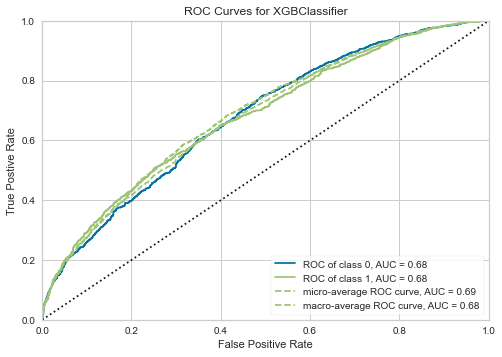

In [17]:
plot_model(xgb, plot='auc')

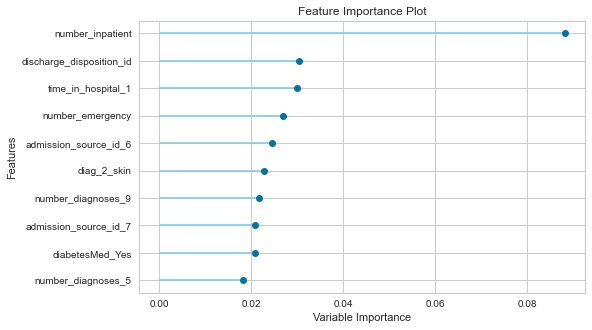

In [18]:
plot_model(xgb, plot='feature')

In [ ]:
exp2 = setup(data=df2, target= 'readmitted', session_id=123, train_size=0.6, normalize=True)

In [ ]:
compare_models()

In [ ]:
lr2 = create_model('lr')

In [ ]:
print(lr2)

In [ ]:
plot_model(lr2, plot='auc')

In [ ]:
plot_model(lr2, plot='feature')

In [ ]:
df2.columns